# Content

## The data contains the following information:

Country- this is the country for which the vaccination information is provided;

Country ISO Code - ISO code for the country;

Date - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;

Total number of vaccinations - this is the absolute number of total immunizations in the country;

Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;

Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;

Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;

Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;

Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;

Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;

Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;

Number of vaccinations per day - number of daily vaccination for that day and country;

Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;

Vaccines used in the country - total number of vaccines used in the country (up to date);

Source name - source of the information (national authority, international organization, local organization etc.);

Source website - website of the source of information;

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as pyp
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("country_vaccinations.csv")
df.head(20)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
5,Albania,ALB,2021-01-15,308.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
6,Albania,ALB,2021-01-16,369.0,369.0,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
7,Albania,ALB,2021-01-17,405.0,405.0,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
8,Albania,ALB,2021-01-18,447.0,447.0,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
9,Albania,ALB,2021-01-19,483.0,483.0,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4678 entries, 0 to 4677
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              4678 non-null   object 
 1   iso_code                             4366 non-null   object 
 2   date                                 4678 non-null   object 
 3   total_vaccinations                   3054 non-null   float64
 4   people_vaccinated                    2595 non-null   float64
 5   people_fully_vaccinated              1746 non-null   float64
 6   daily_vaccinations_raw               2576 non-null   float64
 7   daily_vaccinations                   4518 non-null   float64
 8   total_vaccinations_per_hundred       3054 non-null   float64
 9   people_vaccinated_per_hundred        2595 non-null   float64
 10  people_fully_vaccinated_per_hundred  1746 non-null   float64
 11  daily_vaccinations_per_million

In [5]:
# Replace the 'Missing Values' to '0'.

df = df.fillna(0)

# Convert Date column to date type.

df["date"] = pd.to_datetime(df["date"], format = '%Y-%m-%d')

df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,0.0,0.0,0.0,0.0,64.0,0.00,0.00,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,0.0,0.0,64.0,0.00,0.00,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,0.0,60.0,63.0,0.01,0.01,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,0.0,78.0,66.0,0.01,0.01,0.0,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4673,Zimbabwe,ZWE,2021-02-25,11007.0,11007.0,0.0,3135.0,1572.0,0.07,0.07,0.0,106.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...
4674,Zimbabwe,ZWE,2021-02-26,12579.0,12579.0,0.0,1572.0,1750.0,0.08,0.08,0.0,118.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...
4675,Zimbabwe,ZWE,2021-02-27,15705.0,15705.0,0.0,3126.0,2150.0,0.11,0.11,0.0,145.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...
4676,Zimbabwe,ZWE,2021-02-28,18843.0,18843.0,0.0,3138.0,2551.0,0.13,0.13,0.0,172.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...


In [6]:
# Each country's total vaccinations.

df_vaccine = df.groupby(["country"])['total_vaccinations', 'total_vaccinations_per_hundred', 'daily_vaccinations','daily_vaccinations_per_million'].max().reset_index()
df_vaccine.head()

<ipython-input-6-0faaf5fb9874>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_vaccine = df.groupby(["country"])['total_vaccinations', 'total_vaccinations_per_hundred', 'daily_vaccinations','daily_vaccinations_per_million'].max().reset_index()


,country,total_vaccinations,total_vaccinations_per_hundred,daily_vaccinations,daily_vaccinations_per_million
0,Albania,10135.0,0.35,1043.0,362.0
1,Algeria,75000.0,0.17,3748.0,85.0
2,Andorra,2390.0,3.09,100.0,1294.0
3,Anguilla,2762.0,18.41,331.0,22064.0
4,Argentina,1049169.0,2.32,46705.0,1033.0


In [7]:
#Top 10 countries which vaccinated the most.

top_10_countries = df_vaccine.sort_values(by='total_vaccinations' ,ascending=False).head(10)
top_10_countries

,country,total_vaccinations,total_vaccinations_per_hundred,daily_vaccinations,daily_vaccinations_per_million
113,United States,76899987.0,22.99,1817502.0,5434.0
21,China,40520000.0,2.82,1916190.0,1331.0
112,United Kingdom,21091267.0,31.07,445204.0,6558.0
32,England,17812739.0,31.65,376532.0,6690.0
48,India,14301266.0,1.04,486318.0,352.0
108,Turkey,8774718.0,10.40,435596.0,5165.0
15,Brazil,8465403.0,3.98,262717.0,1236.0
53,Israel,8211997.0,94.88,184735.0,21343.0
38,Germany,6394364.0,7.63,161742.0,1930.0
111,United Arab Emirates,6028417.0,60.95,160020.0,16179.0


Text(0.5, 1.0, 'Top 10 Countries with Total Vaccinations')

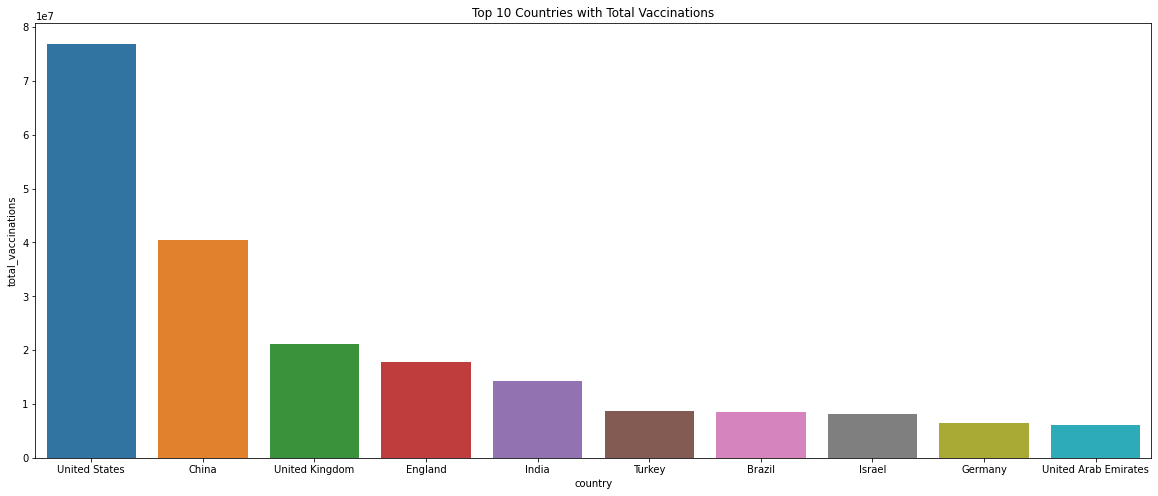

In [8]:
plt.figure(figsize=(20,8))
sns.barplot(x = top_10_countries["country"], y = top_10_countries['total_vaccinations'])
plt.title('Top 10 Countries with Total Vaccinations')

In [9]:
# UK total vaccinations trend

uk_data = df[df['country'] =='United Kingdom']
uk_data.head(30)
uk_data = uk_data[uk_data['total_vaccinations']>100]
uk_data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
4430,United Kingdom,GBR,2020-12-13,86337.0,86337.0,0.0,0.0,0.0,0.13,0.13,0.00,0.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
4437,United Kingdom,GBR,2020-12-20,674545.0,674545.0,0.0,0.0,84030.0,0.99,0.99,0.00,1238.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
4444,United Kingdom,GBR,2020-12-27,1004145.0,1004145.0,0.0,0.0,47086.0,1.48,1.48,0.00,694.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
4451,United Kingdom,GBR,2021-01-03,1401324.0,1379391.0,21933.0,0.0,56740.0,2.06,2.03,0.03,836.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
4458,United Kingdom,GBR,2021-01-10,2677971.0,2286572.0,391399.0,0.0,182378.0,3.94,3.37,0.58,2687.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
4459,United Kingdom,GBR,2021-01-11,2843815.0,2431648.0,412167.0,165844.0,180016.0,4.19,3.58,0.61,2652.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
4460,United Kingdom,GBR,2021-01-12,3067541.0,2639309.0,428232.0,223726.0,185923.0,4.52,3.89,0.63,2739.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
4461,United Kingdom,GBR,2021-01-13,3356229.0,2918252.0,437977.0,288688.0,201110.0,4.94,4.30,0.65,2962.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
4462,United Kingdom,GBR,2021-01-14,3678180.0,3234946.0,443234.0,321951.0,221049.0,5.42,4.77,0.65,3256.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
4463,United Kingdom,GBR,2021-01-15,4023705.0,3576263.0,447442.0,345525.0,244356.0,5.93,5.27,0.66,3600.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


Text(0.5, 1.0, 'UK Total Vaccinations Trend')

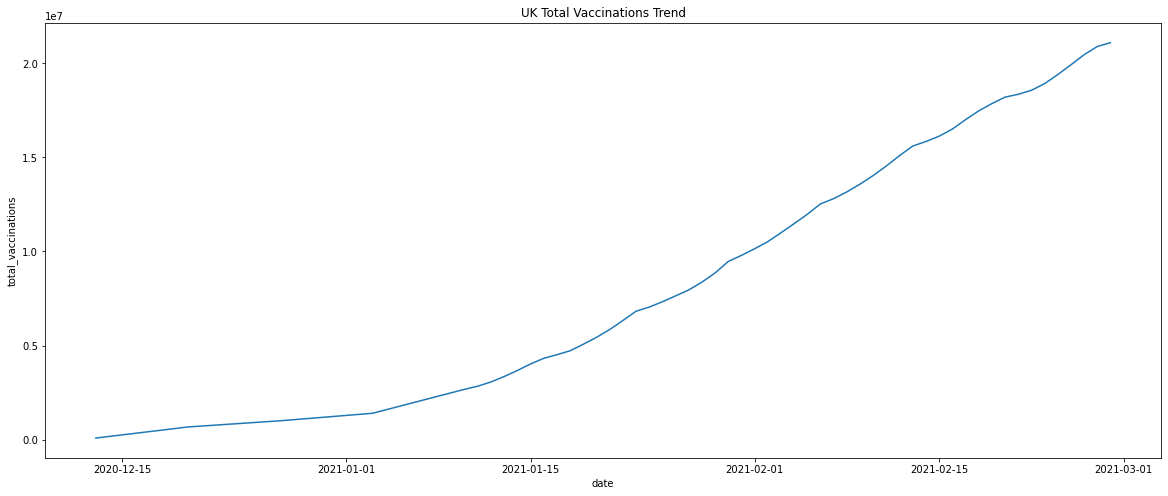

In [10]:
plt.figure(figsize=(20,8))
sns.lineplot(x = uk_data["date"], y = uk_data['total_vaccinations'])

plt.title('UK Total Vaccinations Trend')

In [11]:
# Vaccince Type

vaccince_types = df.groupby(['vaccines'])['country'].unique()
vaccince_types = vaccince_types.reset_index()
vaccince_types

,vaccines,country
0,"Covaxin, Oxford/AstraZeneca",[India]
1,"EpiVacCorona, Sputnik V",[Russia]
2,Johnson&Johnson,[South Africa]
3,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech","[Austria, Belgium, Bulgaria, Czechia, Estonia,..."
4,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",[Hungary]
5,"Moderna, Pfizer/BioNTech","[Canada, Denmark, Israel, Liechtenstein, Portu..."
6,Oxford/AstraZeneca,"[Anguilla, Bangladesh, Barbados, Dominican Rep..."
7,"Oxford/AstraZeneca, Pfizer/BioNTech","[England, Isle of Man, Jersey, Northern Irelan..."
8,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",[United Arab Emirates]
9,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",[Bahrain]


In [14]:
# Top 10 countries with highest number of per hundred vaccinated

top_10_country = df.groupby(['country'])["total_vaccinations_per_hundred"].sum().reset_index()
top_10_country = top_10_country.nlargest(10, ['total_vaccinations_per_hundred']).reset_index()
del top_10_country['index']
top_10_country

,country,total_vaccinations_per_hundred
0,Israel,3287.95
1,Gibraltar,2627.00
2,United Arab Emirates,1906.97
3,Seychelles,1208.48
4,England,871.83
5,United Kingdom,847.48
6,Wales,836.77
7,Northern Ireland,823.84
8,Scotland,775.32
9,Bahrain,612.12
